# Classification Techniques

### Data pre processing

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np 
import pandas as pd
import seaborn as sns
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
%matplotlib inline 

## Preprocessing

In [4]:
df=pd.read_csv("../Dataset/new_data.csv", encoding="ISO-8859-1") # heading = none

In [28]:
# MAP sentiment
label = {"positive": 2, "neutral": 1, "negative": 0}
df["sentiment"]=df["sentiment"].map(label)
y=df["sentiment"]
X=df["news"]

In [39]:
labels = ['Negative', 'Neutral', 'Positive']

In [29]:
df

,sentiment,news
0,1,According to Gran the company have no plan to ...
1,1,Technopolis plan to develop in stage an area o...
2,0,The international electronic industry company ...
3,2,With the new production plant the company woul...
4,2,According to the companyupdated strategy for t...
...,...,...
4835,0,LONDON MarketWatch Share price end lower in Lo...
4836,1,Rinkuskiaibeer sale fell by 6 per cent to 4 m ...
4837,0,Operating profit fell to EUR 35 m from EUR 68 ...
4838,0,Net sale of the Paper segment decrease to EUR ...


In [30]:
#Remove Punctuation & Emoji
for index, row  in enumerate(df.news):
    df["news"][index] = re.sub(r'[^\w\s]', '', row) # punctuation

## Pipeline Random_Forest

In [31]:
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

In [32]:
#SPLIT TRAIN & TEST
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [74]:
X_train.shape, X_test.shape,  y_train.shape, y_test.shape 

((3388,), (1452,), (3388,), (1452,))

In [34]:
bin_pipeline = Pipeline([
    ('vect', CountVectorizer(min_df=10, lowercase=True, stop_words='english')),  # feature extraction
    ('tfidf', TfidfTransformer()),  # weighting
    ('learner', RandomForestClassifier(random_state=42))  # learning algorithm
])

bin_pipeline.fit(X_train,y_train)
bin_predictions = bin_pipeline.predict(X_test)

In [36]:
print('Accuracy %s' % accuracy_score(y_test, bin_predictions))
print('F1-score %s' % f1_score(y_test, bin_predictions, average=None))
print(classification_report(y_test, bin_predictions))
print('Confusion matrix:')
cm = confusion_matrix(y_test, bin_predictions)
print(cm)

Accuracy 0.743801652892562
F1-score [0.55218855 0.82816605 0.59659091]
              precision    recall  f1-score   support

           0       0.73      0.44      0.55       185
           1       0.76      0.91      0.83       862
           2       0.70      0.52      0.60       405

    accuracy                           0.74      1452
   macro avg       0.73      0.63      0.66      1452
weighted avg       0.74      0.74      0.73      1452

Confusion matrix:
[[ 82  70  33]
 [ 18 788  56]
 [ 12 183 210]]


<AxesSubplot:>

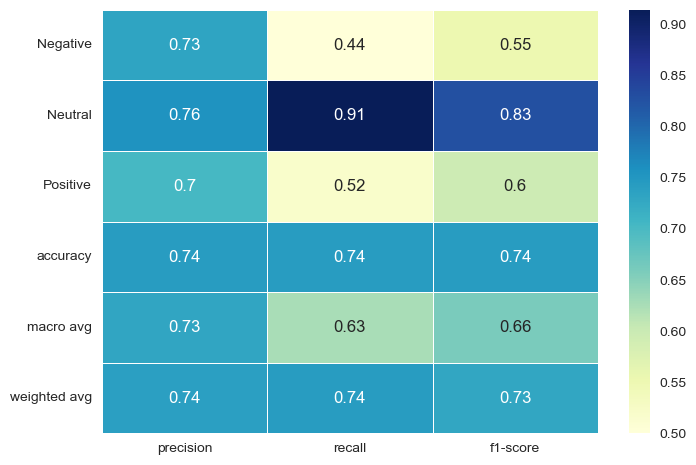

In [40]:
clf_report = classification_report(y_test, bin_predictions,
                                   target_names=labels,
                                   output_dict=True)

sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True, linewidths=.5, vmin=0.5, cmap="YlGnBu") ## 

## Hyper parameter tuning

In [17]:
param_list = {'max_depth': [None],    
             'min_samples_split': [2, 4, 7, 10, 15],
             'min_samples_leaf': [1, 2, 3, 5, 10], 
             'criterion': ['entropy', 'gini'],
             'max_features': ['auto', 'sqrt', 'log2'],
             'n_estimators' : [200,300,400,500]
             }

In [19]:
clf = RandomForestClassifier(max_depth=None, min_samples_leaf= 1, min_samples_split=15,
                             n_estimators=400, max_features='sqrt', n_jobs=-1, criterion ='gini')
clf.fit(X_train, np.ravel(y_train))


RandomForestClassifier(min_samples_split=15, n_estimators=400, n_jobs=-1)

In [20]:
grid_search = GridSearchCV(clf, param_grid=param_list, cv=5)
grid_search.fit(X_train, np.ravel(y_train))


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(min_samples_split=15,
                                              n_estimators=400, n_jobs=-1),
             param_grid={'criterion': ['entropy', 'gini'], 'max_depth': [None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 10],
                         'min_samples_split': [2, 4, 7, 10, 15],
                         'n_estimators': [200, 300, 400, 500]})

In [22]:
grid_search.best_estimator_

RandomForestClassifier(max_features='auto', min_samples_split=7,
                       n_estimators=400, n_jobs=-1)

In [23]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 7,
 'n_estimators': 400}

In [ ]:
clf = RandomForestClassifier(max_depth=None, min_samples_leaf= 1, min_samples_split=7,
                             n_estimators=400, max_features='auto', n_jobs=-1, criterion ='gini')
clf.fit(X_train, np.ravel(y_train))

In [25]:
y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.7575757575757576
F1-score [0.55704698 0.83929525 0.63028649]
              precision    recall  f1-score   support

           0       0.73      0.45      0.56       185
           1       0.78      0.91      0.84       862
           2       0.70      0.57      0.63       405

    accuracy                           0.76      1452
   macro avg       0.74      0.64      0.68      1452
weighted avg       0.75      0.76      0.75      1452



In [42]:
bin_pipeline = Pipeline([
    ('vect', CountVectorizer(min_df=10, lowercase=True, stop_words='english')),  # feature extraction
    ('tfidf', TfidfTransformer()),  # weighting
    ('learner', RandomForestClassifier(random_state=42, max_depth=None, min_samples_leaf= 1, min_samples_split=7,
                             n_estimators=400, max_features='auto', n_jobs=-1, criterion ='gini'))  # learning algorithm
])

bin_pipeline.fit(X_train,y_train)
bin_predictions = bin_pipeline.predict(X_test)

In [43]:
print('Accuracy %s' % accuracy_score(y_test, bin_predictions))
print('F1-score %s' % f1_score(y_test, bin_predictions, average=None))
print(classification_report(y_test, bin_predictions))
print('Confusion matrix:')
cm = confusion_matrix(y_test, bin_predictions)
print(cm)

Accuracy 0.7444903581267218
F1-score [0.52702703 0.82852648 0.60770328]
              precision    recall  f1-score   support

           0       0.70      0.42      0.53       185
           1       0.76      0.92      0.83       862
           2       0.72      0.53      0.61       405

    accuracy                           0.74      1452
   macro avg       0.73      0.62      0.65      1452
weighted avg       0.74      0.74      0.73      1452

Confusion matrix:
[[ 78  73  34]
 [ 23 790  49]
 [ 10 182 213]]


<AxesSubplot:>

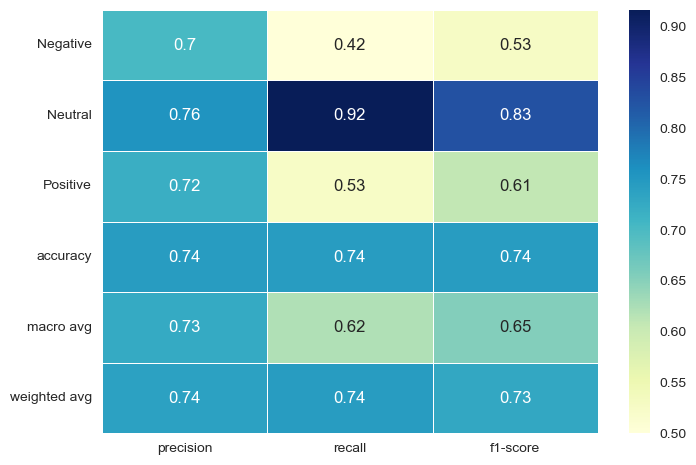

In [44]:
clf_report = classification_report(y_test, bin_predictions,
                                   target_names=labels,
                                   output_dict=True)

sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True, linewidths=.5, vmin=0.5, cmap="YlGnBu") ## 

## SVM

## Pipeline SVM

In [75]:
from sklearn.svm import SVC

In [76]:
#SPLIT TRAIN & TEST
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [77]:
bin_pipeline = Pipeline([
    ('vect', CountVectorizer(min_df=10, lowercase=True, stop_words='english')),  # feature extraction
    ('tfidf', TfidfTransformer()),  # weighting
    ('learner', SVC(random_state=42, C=10, kernel='rbf'))  # learning algorithm # tuned parameters 
])

bin_pipeline.fit(X_train,y_train)
bin_predictions = bin_pipeline.predict(X_test)

In [78]:
print('Accuracy %s' % accuracy_score(y_test, bin_predictions))
print('F1-score %s' % f1_score(y_test, bin_predictions, average=None))
print(classification_report(y_test, bin_predictions))
print('Confusion matrix:')
cm = confusion_matrix(y_test, bin_predictions)
print(cm)

Accuracy 0.7465564738292011
F1-score [0.58860759 0.8279513  0.59799714]
              precision    recall  f1-score   support

           0       0.71      0.50      0.59       185
           1       0.76      0.91      0.83       862
           2       0.71      0.52      0.60       405

    accuracy                           0.75      1452
   macro avg       0.73      0.64      0.67      1452
weighted avg       0.74      0.75      0.73      1452

Confusion matrix:
[[ 93  66  26]
 [ 21 782  59]
 [ 17 179 209]]


<AxesSubplot:>

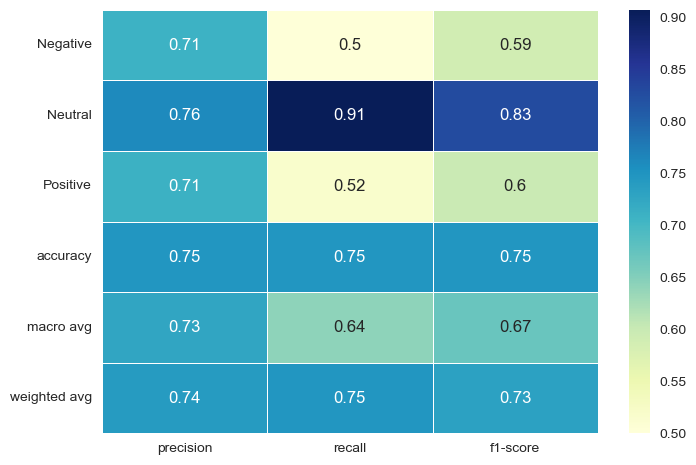

In [79]:
clf_report = classification_report(y_test, bin_predictions,
                                   target_names=labels,
                                   output_dict=True)

sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True, linewidths=.5, vmin=0.5, cmap="YlGnBu") ## 

In [80]:
from yellowbrick.model_selection import LearningCurve

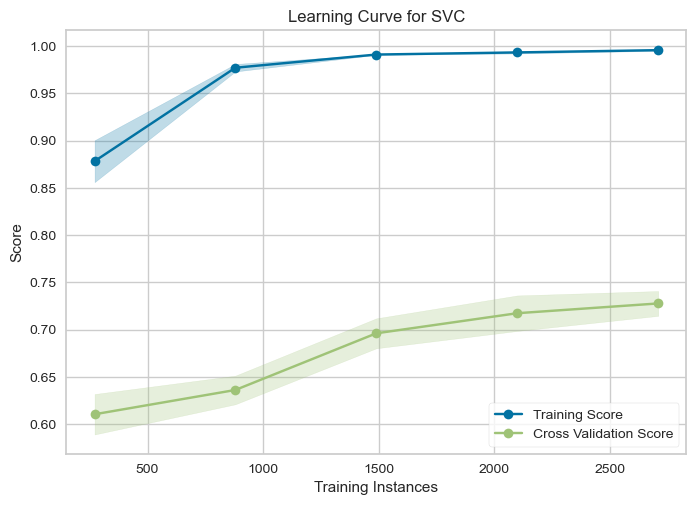

<AxesSubplot:title={'center':'Learning Curve for SVC'}, xlabel='Training Instances', ylabel='Score'>

In [81]:
lc = LearningCurve(bin_pipeline, scoring='accuracy')
lc.fit(X_train, y_train)
lc.show()

### SVM Hyperparameter tuning


In [63]:
param_grid = {'C':[0.1, 1, 10, 100, 1000], 'kernel' : ['linear', 'sigmoid', 'poly', 'rbf']}

In [ ]:
grid= GridSearchCV(SVC(), param_grid, refit=True)
grid.fit(X_train, np.ravel(y_train))

In [22]:
grid.best_params_

{'C': 10, 'kernel': 'rbf'}

In [ ]:
predict_svc_grid=grid.predict(X_test)

In [ ]:
#After GS
clf_SVC = SVC(C=10, kernel='rbf') #Best Params for Unbalanced Dataset 
clf_SVC.fit(X_train, np.ravel(y_train))
clf_SVC = clf_SVC.predict(X_test)

In [24]:
print(classification_report(y_test, clf_SVC))
print("CONFUSION MATRIX\n", confusion_matrix(y_test,clf_SVC))
print('Accuracy %s' % accuracy_score(y_test, clf_SVC))
print('F1-score %s' % f1_score(y_test, clf_SVC,average=None))

              precision    recall  f1-score   support

           0       0.71      0.51      0.59       393
           1       0.69      0.36      0.48       182
           2       0.76      0.93      0.83       879

    accuracy                           0.74      1454
   macro avg       0.72      0.60      0.63      1454
weighted avg       0.73      0.74      0.72      1454

CONFUSION MATRIX
 [[199  18 176]
 [ 29  66  87]
 [ 54  11 814]]
Accuracy 0.7420907840440165
F1-score [0.58962963 0.4765343  0.83231084]
